In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import pacf
import datetime
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam,SGD

In [2]:
def plot_series(df,format='-',start = 0, end = None):
    plt.plot(df['Umsatz'],format)
    plt.xlabel("Time")
    plt.ylabel("sales")
    plt.grid(True)

In [102]:
dataframe = pd.read_csv('meteolytix_Corona_bakery_turnover_updated.csv')

dataframe['Datum']=pd.to_datetime(dataframe['Datum'])

dataframe['Quarter'] = dataframe['Datum'].apply(lambda x: x.quarter)
dataframe['DayofTheWeek'] = dataframe['Datum'].apply(lambda x: x.weekday()+1)

#dataframe.set_index('Datum',inplace=True)

In [103]:
cdf = pd.read_csv('covid-data.csv')
cdf['date'] = pd.to_datetime(cdf['date'])

cdf.rename(columns={'date':'Datum'},inplace=True)

cdf = cdf[['Datum','total_cases','new_cases','total_cases_per_million','new_cases_per_million']]

In [104]:
dataframe = dataframe.join(cdf.set_index('Datum'),on='Datum')

In [105]:
dataframe[['total_cases','new_cases','total_cases_per_million','new_cases_per_million']]= dataframe[['total_cases','new_cases','total_cases_per_million','new_cases_per_million']].fillna(0)

In [106]:
prodG1 = dataframe[dataframe['Warengruppe'] == 1]
prodG2 = dataframe[dataframe['Warengruppe'] == 2]
prodG3 = dataframe[dataframe['Warengruppe'] == 3]
prodG4 = dataframe[dataframe['Warengruppe'] == 4]
prodG5 = dataframe[dataframe['Warengruppe'] == 5]
prodG6 = dataframe[dataframe['Warengruppe'] == 6]

In [107]:
prodG1.drop('Warengruppe',axis=1,inplace=True) 
prodG2.drop('Warengruppe',axis=1,inplace=True) 
prodG3.drop('Warengruppe',axis=1,inplace=True) 
prodG4.drop('Warengruppe',axis=1,inplace=True) 
prodG5.drop('Warengruppe',axis=1,inplace=True) 
prodG6.drop('Warengruppe',axis=1,inplace=True) 

In [108]:
prodG1.set_index('Datum',inplace=True)
prodG2.set_index('Datum',inplace=True)
prodG3.set_index('Datum',inplace=True)
prodG4.set_index('Datum',inplace=True)
prodG5.set_index('Datum',inplace=True)
prodG6.set_index('Datum',inplace=True)

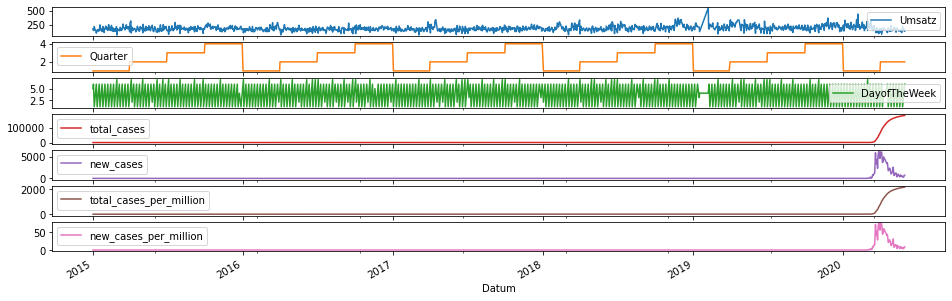

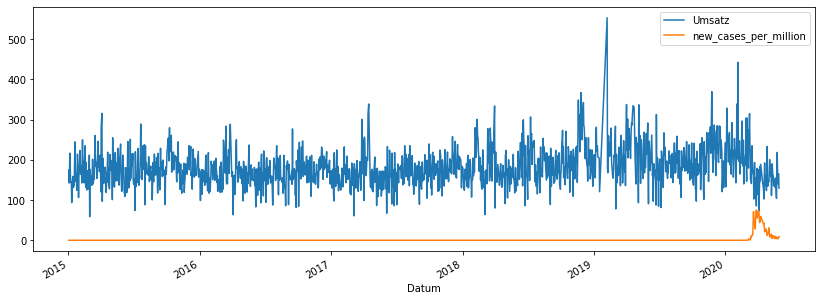

In [10]:

#prodG1.plot()
prodG1.plot(subplots=True,figsize=(16,5))
prodG1.plot(y=['Umsatz','new_cases_per_million'],figsize=(14,5))

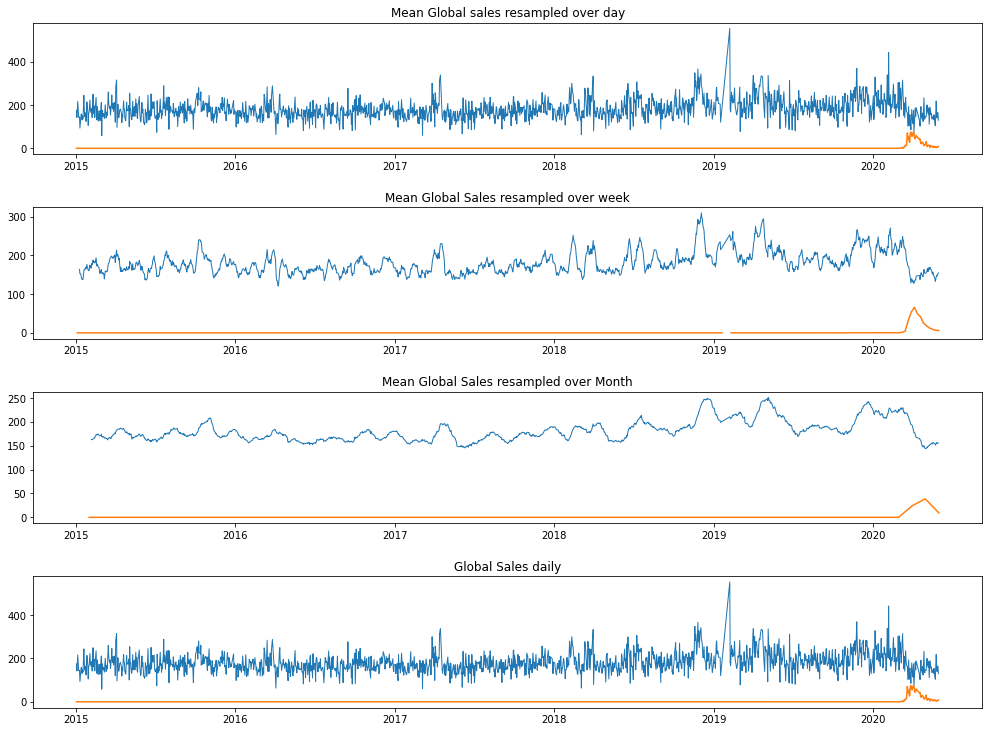

In [11]:
fig = plt.figure(figsize=(17,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
#ax1.plot(prodG1['Umsatz'].resample('D').mean(),linewidth=1)
ax1.plot(prodG1['Umsatz'].rolling(window=1).mean(),linewidth=1)
ax1.set_title('Mean Global sales resampled over day')
ax1.tick_params(axis='both', which='major')
ax1.plot(prodG1['new_cases_per_million'])

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(prodG1['Umsatz'].rolling(window=7).mean(),linewidth=1)
ax2.set_title('Mean Global Sales resampled over week')
ax2.tick_params(axis='both', which='major')
ax2.plot(prodG1['new_cases_per_million'].resample('W').mean())

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(prodG1['Umsatz'].rolling(window=30).mean(),linewidth=1)
ax3.set_title('Mean Global Sales resampled over Month')
ax3.tick_params(axis='both', which='major')
ax3.plot(prodG1['new_cases_per_million'].resample('M').mean())


In [109]:
meanprodG1 = prodG1
meanprodG1['Umsatz'] = meanprodG1['Umsatz'].rolling(window=14).mean()
meanprodG1['Umsatz'] = meanprodG1['Umsatz'].fillna(0)
meanprodG1.reset_index(inplace=True)
meanprodG1.head()

,Datum,Umsatz,Quarter,DayofTheWeek,total_cases,new_cases,total_cases_per_million,new_cases_per_million
0,2015-01-02,0.0,1,5,0.0,0.0,0.0,0.0
1,2015-01-03,0.0,1,6,0.0,0.0,0.0,0.0
2,2015-01-05,0.0,1,1,0.0,0.0,0.0,0.0
3,2015-01-06,0.0,1,2,0.0,0.0,0.0,0.0
4,2015-01-07,0.0,1,3,0.0,0.0,0.0,0.0


In [110]:
    dataset = meanprodG1.Umsatz.values 
    dataset = dataset.astype('float32')
    dataset = np.reshape(dataset, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    train_size = 1300
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [160]:
    #dataset = meanprodG1.Umsatz.values 
    #dataset = dataset.astype('float32')
    #dataset = tf.data.Dataset.from_tensor_slices(dataset)
    #dataset = dataset.window(14,shift=1,drop_remainder=True)
    #dataset = dataset.flat_map(lambda window: window.batch(14))
    #dataset = dataset.map(lambda window: (window[:-1]),window[-1:])
    #for x,y in dataset:
    #    print("x = ",x.numpy())
    #    print("y = ",y.numpy())

NameError: name 'window' is not defined

In [111]:
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [114]:
look_back = 14
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [121]:
X_train.shape


(1285, 14)

In [116]:
Y_train.shape

(1285,)

In [122]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [123]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, 
                         kernel_size=5,
                         strides=1,
                         padding="causal",
                         activation='relu',
                         input_shape=(X_train.shape[1], X_train.shape[2])),
  tf.keras.layers.LSTM(50,return_sequences=True),
  tf.keras.layers.LSTM(50),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(X_train, Y_train, epochs=100,callbacks=[lr_schedule])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 1, 32)             2272      
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 50)             16600     
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
_________________________________________________________________
lambda_7 (Lambda)            (None, 1)               

1285/1285 [==============================] - 0s 207us/sample - loss: 0.0020 - mae: 0.0522
Epoch 68/100
1285/1285 [==============================] - 0s 197us/sample - loss: 0.0680 - mae: 0.3140
Epoch 69/100
1285/1285 [==============================] - 0s 213us/sample - loss: 1.3929 - mae: 1.8667
Epoch 70/100
1285/1285 [==============================] - 0s 202us/sample - loss: 2.3326 - mae: 2.8015
Epoch 71/100
1285/1285 [==============================] - 0s 198us/sample - loss: 6.6857 - mae: 7.1723
Epoch 72/100
1285/1285 [==============================] - 0s 205us/sample - loss: 4.0638 - mae: 4.5470
Epoch 73/100
1285/1285 [==============================] - 0s 199us/sample - loss: 2.9110 - mae: 3.4109
Epoch 74/100
1285/1285 [==============================] - 0s 204us/sample - loss: 2.0983 - mae: 2.5644
Epoch 75/100
1285/1285 [==============================] - 0s 203us/sample - loss: 9.6652 - mae: 10.1422
Epoch 76/100
1285/1285 [==============================] - 0s 203us/sample - loss: 13.

(1e-08, 1e-05, 0.01, 0.1)

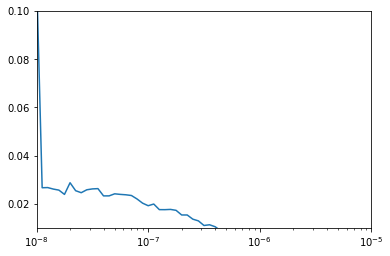

In [126]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-5, 0.01, 0.1])

In [155]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, 
                         kernel_size=5,
                         strides=1,
                         padding="causal",
                         activation='relu',
                         input_shape=(X_train.shape[1], X_train.shape[2])),
  tf.keras.layers.LSTM(50,return_sequences=True),
  tf.keras.layers.LSTM(50),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()

model.compile(loss='mse',
                  optimizer=Adam(lr = 2e-6),
                  metrics=["mae"]
                  )


history = model_G2.fit(X_train, Y_train, epochs=300, batch_size=30, validation_data=(X_test, Y_test), 
                     verbose=2, shuffle=False)


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 1, 32)             2272      
_________________________________________________________________
lstm_32 (LSTM)               (None, 1, 50)             16600     
_________________________________________________________________
lstm_33 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
_________________________________________________________________
lambda_12 (Lambda)           (None, 1)               

Epoch 69/300
1285/1285 - 0s - loss: 2.5228e-04 - mae: 0.0122 - val_loss: 4.0139e-04 - val_mae: 0.0161
Epoch 70/300
1285/1285 - 0s - loss: 2.7044e-04 - mae: 0.0124 - val_loss: 4.2103e-04 - val_mae: 0.0159
Epoch 71/300
1285/1285 - 0s - loss: 2.4506e-04 - mae: 0.0118 - val_loss: 4.0440e-04 - val_mae: 0.0159
Epoch 72/300
1285/1285 - 0s - loss: 2.6888e-04 - mae: 0.0122 - val_loss: 4.1248e-04 - val_mae: 0.0161
Epoch 73/300
1285/1285 - 0s - loss: 2.6067e-04 - mae: 0.0123 - val_loss: 4.1301e-04 - val_mae: 0.0160
Epoch 74/300
1285/1285 - 0s - loss: 2.5244e-04 - mae: 0.0122 - val_loss: 4.0142e-04 - val_mae: 0.0159
Epoch 75/300
1285/1285 - 0s - loss: 2.6668e-04 - mae: 0.0123 - val_loss: 3.9756e-04 - val_mae: 0.0159
Epoch 76/300
1285/1285 - 0s - loss: 2.6128e-04 - mae: 0.0122 - val_loss: 4.1537e-04 - val_mae: 0.0163
Epoch 77/300
1285/1285 - 0s - loss: 2.6679e-04 - mae: 0.0123 - val_loss: 4.0455e-04 - val_mae: 0.0161
Epoch 78/300
1285/1285 - 0s - loss: 2.7360e-04 - mae: 0.0123 - val_loss: 4.0069e-0

Epoch 149/300
1285/1285 - 0s - loss: 2.4817e-04 - mae: 0.0120 - val_loss: 4.0447e-04 - val_mae: 0.0159
Epoch 150/300
1285/1285 - 0s - loss: 2.4848e-04 - mae: 0.0119 - val_loss: 4.0767e-04 - val_mae: 0.0162
Epoch 151/300
1285/1285 - 0s - loss: 2.5343e-04 - mae: 0.0121 - val_loss: 4.0302e-04 - val_mae: 0.0161
Epoch 152/300
1285/1285 - 0s - loss: 2.5081e-04 - mae: 0.0122 - val_loss: 4.1359e-04 - val_mae: 0.0162
Epoch 153/300
1285/1285 - 0s - loss: 2.9627e-04 - mae: 0.0126 - val_loss: 4.0444e-04 - val_mae: 0.0161
Epoch 154/300
1285/1285 - 0s - loss: 2.7049e-04 - mae: 0.0123 - val_loss: 3.9881e-04 - val_mae: 0.0162
Epoch 155/300
1285/1285 - 0s - loss: 2.7536e-04 - mae: 0.0127 - val_loss: 3.9241e-04 - val_mae: 0.0155
Epoch 156/300
1285/1285 - 0s - loss: 2.4849e-04 - mae: 0.0119 - val_loss: 3.8896e-04 - val_mae: 0.0158
Epoch 157/300
1285/1285 - 0s - loss: 2.6945e-04 - mae: 0.0123 - val_loss: 3.9090e-04 - val_mae: 0.0155
Epoch 158/300
1285/1285 - 0s - loss: 2.5735e-04 - mae: 0.0121 - val_loss:

Epoch 229/300
1285/1285 - 0s - loss: 2.5586e-04 - mae: 0.0121 - val_loss: 4.0022e-04 - val_mae: 0.0159
Epoch 230/300
1285/1285 - 0s - loss: 2.4886e-04 - mae: 0.0119 - val_loss: 4.0730e-04 - val_mae: 0.0156
Epoch 231/300
1285/1285 - 0s - loss: 2.4851e-04 - mae: 0.0119 - val_loss: 4.0697e-04 - val_mae: 0.0164
Epoch 232/300
1285/1285 - 0s - loss: 2.5470e-04 - mae: 0.0121 - val_loss: 4.0012e-04 - val_mae: 0.0159
Epoch 233/300
1285/1285 - 0s - loss: 2.3193e-04 - mae: 0.0117 - val_loss: 4.1091e-04 - val_mae: 0.0162
Epoch 234/300
1285/1285 - 0s - loss: 2.4750e-04 - mae: 0.0119 - val_loss: 4.0064e-04 - val_mae: 0.0159
Epoch 235/300
1285/1285 - 0s - loss: 2.5196e-04 - mae: 0.0122 - val_loss: 3.9558e-04 - val_mae: 0.0156
Epoch 236/300
1285/1285 - 0s - loss: 2.5700e-04 - mae: 0.0121 - val_loss: 3.9430e-04 - val_mae: 0.0155
Epoch 237/300
1285/1285 - 0s - loss: 2.6081e-04 - mae: 0.0121 - val_loss: 3.9699e-04 - val_mae: 0.0161
Epoch 238/300
1285/1285 - 0s - loss: 2.5592e-04 - mae: 0.0121 - val_loss:

In [156]:
# make predictions
train_predict = model.predict(X_train_G2)
test_predict = model.predict(X_test_G2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train_Sca = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_Sca = scaler.inverse_transform([Y_test])



In [157]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train_Sca[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train_Sca[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test_Sca[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test_Sca[0], test_predict[:,0])))

Train Mean Absolute Error: 23.58325000390075
Train Root Mean Squared Error: 29.952905364983504
Test Mean Absolute Error: 28.034905305264193
Test Root Mean Squared Error: 31.517167524737683


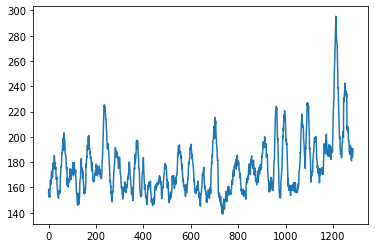

In [161]:
plt.plot(Y_train_G2_Sca[0])

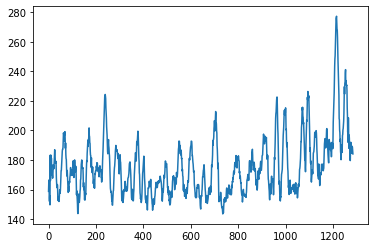

In [162]:
plt.plot(train_predict_G2[:,0])

In [163]:
train_predict_G2[:,0]

array([158.79726, 164.68385, 166.50128, ..., 188.64642, 185.70813,
       184.1125 ], dtype=float32)

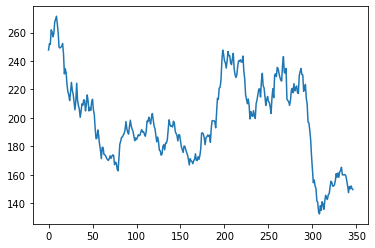

In [164]:
plt.plot(Y_test_G2_Sca[0])

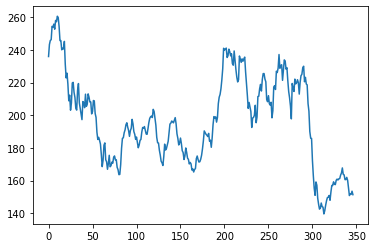

In [165]:
plt.plot(test_predict_G2[:,0])

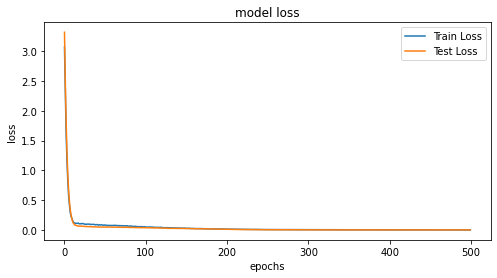

In [166]:
plt.figure(figsize=(8,4))
plt.plot(history_G2.history['loss'], label='Train Loss')
plt.plot(history_G2.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

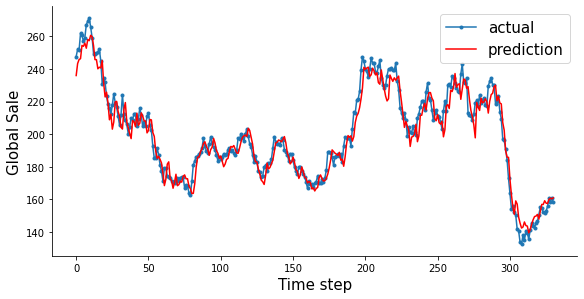

In [167]:
aa=[x for x in range(331)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test_G2_Sca[0][:331], marker='.', label="actual")
plt.plot(aa, test_predict_G2[:,0][:331], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global Sale', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();